In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv('bike-sharing-three-models.csv')
data_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


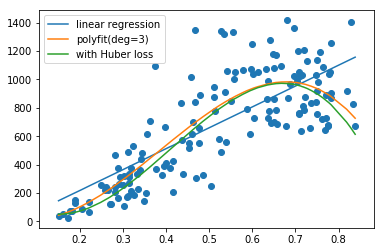

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract variables
x = data_df.temp.values
y = data_df.users.values

# Plot the models
plt.scatter(x, y)
plt.plot(x, data_df.pred_lr, label='linear regression')
plt.plot(x, data_df.pred_poly3, label='polyfit(deg=3)')
plt.plot(x, data_df.pred_huber3, label='with Huber loss')
plt.legend()
plt.show()

In [3]:
import numpy as np

# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred)) # MSE
    return np.sqrt(mse) # RMSE

rmse_lr = RMSE(y, data_df.pred_lr)
print('linear regression RMSE: {:.1f}'.format(rmse_lr))
# Prints: 232.5

rmse_poly3 = RMSE(y, data_df.pred_poly3)
print('polyfit(deg=3) RMSE: {:.1f}'.format(rmse_poly3))
# Prints: 210.6

rmse_huber3 = RMSE(y, data_df.pred_huber3)
print('with huber loss RMSE: {:.1f}'.format(rmse_huber3))
# Prints: 215.7

linear regression RMSE: 232.5
polyfit(deg=3) RMSE: 210.6
with huber loss RMSE: 215.7


In [4]:
import numpy as np

# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

mae_lr = MAE(y, data_df.pred_lr)
print('linear regression MAE: {:.1f}'.format(mae_lr)) # Prints: 186.6

mae_poly3 = MAE(y, data_df.pred_poly3)
print('polyfit(deg=3) MAE: {:.1f}'.format(mae_poly3)) # Prints: 161.7

mae_huber3 = MAE(y, data_df.pred_huber3)
print('with huber loss MAE: {:.1f}'.format(mae_huber3)) # Prints: 164.8

linear regression MAE: 186.6
polyfit(deg=3) MAE: 161.7
with huber loss MAE: 164.8


In [5]:
pred_baseline = np.mean(y) # equals to 674.7218543
rmse_baseline = RMSE(y, pred_baseline)
rmse_baseline # Returns: 371.11459394676217

371.11459394676217

In [6]:
pred_baseline = np.full_like(y, fill_value=np.mean(y), dtype=np.float)
pred_baseline # Returns: array([ 674.7218543, 674.7218543,  

array([ 674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7218543,
        674.7218543,  674.7218543,  674.7218543,  674.7

In [7]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy='mean')

In [8]:
dummy.fit(x[:, np.newaxis], y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [9]:
pred_baseline = dummy.predict(x[:, np.newaxis])

rmse_baseline = RMSE(y, pred_baseline)
rmse_baseline # Returns: 371.11459394676217

371.11459394676217

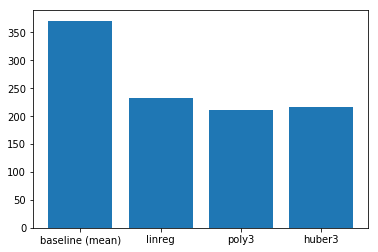

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Bar chart
plt.bar([1, 2, 3, 4], [rmse_baseline, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'linreg', 'poly3', 'huber3'])
plt.show()